# Microsoft_Movie_Analysis
##  Author: Brian Kariithi
#  Overview
Microsoft has made the strategic decision to establish a new film studio and is seeking deeper insights into the most successful film genres at the box office. This initiative involves employing descriptive statistical analysis on datasets collected from the IMDb website to understand the combinations of genres that excel in various key areas. The analysis encompasses four distinct datasets, examining the genres that performed exceptionally well in terms of domestic gross sales, foreign gross sales, average ratings, number of votes, and production budgets relative to domestic and worldwide gross earnings.
The findings highlight that the combination of Action, Adventure, and Sci-Fi consistently emerged as the top performer across the categories of Domestic Sales, Foreign Sales, and number of votes. Adventure played a pivotal role in the majority of the top 20 combinations across these three categories. Based on this analysis, the recommendation for Microsoft's movie production would be to focus on the Action, Adventure, and Sci-Fi genre, given its prevalence and success in the dataset. It's noteworthy that after data cleaning, there were 322 unique genre combinations considered.
Additionally, Adventure and Action paired with either Animation or Fantasy proved to be successful combinations, making them a secondary recommendation for consideration. The combination of Adventure, Animation, and Comedy also demonstrated favorable performance in both Domestic and Foreign Sales, standing as a third recommendation. The analysis underscores Adventure as a robust genre, consistently associated with popular and successful films.

# Business Problem
Microsoft aims to create profitable movies and is keen on identifying the most successful genres. To address this inquiry, an analysis was conducted on Domestic and Foreign Sales data, as well as the production budget in relation to Domestic gross and worldwide gross. The objective was to determine the financially lucrative genres. Additionally, the average rating and number of votes were examined for each genre, providing insights into the correlation between popularity and financial success.

# Questions for Analysis
which types of movies to produce in relation to audience preferences and industry trends

What considerations need to be taken into account when deciding on the optimal mix of genres for Microsoft's movie production endeavors?

How can the insights gained from this analysis be leveraged to inform long-term strategic planning and decision-making within the Microsoft Movie Making industry?

#### Datasets to be used
imdb.title.basics

imdb.title.ratings

bom.movie_gr

tn.movie_budgets.csvos

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the gross income data
df_1 = pd.read_csv('C:/Users/USER/Desktop/Moringa/Phase_1_project/bom.movie_gross.csv' )

In [3]:
#understanding the data
df_1.head()
#print(df_1.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
df_1.info()
#print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
df_1.describe(include ='all')

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [6]:
#loading the movie budgets dataset
df_2 = pd.read_csv('C:/Users/USER/Desktop/Moringa/Phase_1_project/tn.movie_budgets.csv')

In [7]:
df_2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
df_2.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [10]:
df_3 = pd.read_csv('C:/Users/USER/Desktop/Moringa/Phase_1_project/title.ratings.csv')

In [11]:
df_3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
df_3.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [14]:
df_4 = pd.read_csv('C:/Users/USER/Desktop/Moringa/Phase_1_project/title.basics.csv')

In [15]:
df_4.head()

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   title            146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
#merging the dataFrames based on 'title'
merged_df1 = pd.merge(df_1, df_4, on='title')
merged_df1.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"


In [18]:
#merging the dataFrames based on 'tconst'
merged_df2 = pd.merge(merged_df1, df_3, on='tconst')
merged_df2.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [19]:
#merging the dataFrames using concatenation
#.merge resulted in an error as the data involved was float64 and object columns.
#pd.concat was used to concatenate dataframes along the axis... this is used when merging data that does not have common keys
merged_df3 = pd.concat([merged_df2, df_2,], axis=0)
merged_df3.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,NaN,NaN,NaN,NaN,NaN
1,Inception,WB,292600000.0,535700000,2010.0,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,NaN,NaN,NaN,NaN,NaN
2,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,NaN,NaN,NaN,NaN,NaN
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,tt1325004,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733.0,NaN,NaN,NaN,NaN,NaN
4,Iron Man 2,Par.,312400000.0,311500000,2010.0,tt1228705,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0,NaN,NaN,NaN,NaN,NaN


In [20]:
merged_df3.describe(include = 'all')

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,worldwide_gross
count,3027,3024,8787,1833,3027.000000,3027,3027,3027.000000,2980.000000,3020,3027.000000,3.027000e+03,5782.000000,5782,5782,5782,5782
unique,2597,216,6686,1006,NaN,3025,2726,NaN,NaN,322,NaN,NaN,NaN,2418,5698,509,5356
top,Eden,Uni.,$0,1200000,NaN,tt6599340,Eden,NaN,NaN,Drama,NaN,NaN,NaN,"Dec 31, 2014",Halloween,"$20,000,000",$0
freq,6,156,548,17,NaN,2,6,NaN,NaN,317,NaN,NaN,NaN,24,3,231,367
mean,NaN,NaN,NaN,NaN,2014.075652,NaN,NaN,2013.781302,107.211409,NaN,6.457912,6.169492e+04,50.372363,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2.442307,NaN,NaN,2.466780,20.078921,NaN,1.012225,1.255155e+05,28.821076,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN,2010.000000,3.000000,NaN,1.600000,5.000000e+00,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,2012.000000,94.000000,NaN,5.900000,2.107000e+03,25.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,2014.000000,105.000000,NaN,6.600000,1.308900e+04,50.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,2016.000000,118.000000,NaN,7.100000,6.276550e+04,75.000000,NaN,NaN,NaN,NaN


In [21]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8809 entries, 0 to 5781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3027 non-null   object 
 1   studio             3024 non-null   object 
 2   domestic_gross     8787 non-null   object 
 3   foreign_gross      1833 non-null   object 
 4   year               3027 non-null   float64
 5   tconst             3027 non-null   object 
 6   original_title     3027 non-null   object 
 7   start_year         3027 non-null   float64
 8   runtime_minutes    2980 non-null   float64
 9   genres             3020 non-null   object 
 10  averagerating      3027 non-null   float64
 11  numvotes           3027 non-null   float64
 12  id                 5782 non-null   float64
 13  release_date       5782 non-null   object 
 14  movie              5782 non-null   object 
 15  production_budget  5782 non-null   object 
 16  worldwide_gross    5782 non-n

In [22]:
#make the merged data into a dataframe
df = merged_df3
df

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,NaN,NaN,NaN,NaN,NaN
1,Inception,WB,292600000.0,535700000,2010.0,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,NaN,NaN,NaN,NaN,NaN
2,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,NaN,NaN,NaN,NaN,NaN
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,tt1325004,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733.0,NaN,NaN,NaN,NaN,NaN
4,Iron Man 2,Par.,312400000.0,311500000,2010.0,tt1228705,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,NaN,NaN,$0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,"Dec 31, 2018",Red 11,"$7,000",$0
5778,NaN,NaN,"$48,482",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,"Apr 2, 1999",Following,"$6,000","$240,495"
5779,NaN,NaN,"$1,338",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,NaN,NaN,$0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


#### DATA CLEANING

In [24]:
# foreign gross is not an object 
#df['foreign_gross']= df['foreign_gross'].astype(float)
# Remove non-numeric characters from 'foreign_gross' column
df['foreign_gross'] = df['foreign_gross'].replace('[\$,]', '', regex=True)

# Convert 'foreign_gross' column to float
df['foreign_gross'] = df['foreign_gross'].astype(float)

# Display the DataFrame
print(df.head())

                        title studio domestic_gross  foreign_gross    year  \
0                 Toy Story 3     BV    415000000.0    652000000.0  2010.0   
1                   Inception     WB    292600000.0    535700000.0  2010.0   
2         Shrek Forever After   P/DW    238700000.0    513900000.0  2010.0   
3  The Twilight Saga: Eclipse   Sum.    300500000.0    398000000.0  2010.0   
4                  Iron Man 2   Par.    312400000.0    311500000.0  2010.0   

      tconst              original_title  start_year  runtime_minutes  \
0  tt0435761                 Toy Story 3      2010.0            103.0   
1  tt1375666                   Inception      2010.0            148.0   
2  tt0892791         Shrek Forever After      2010.0             93.0   
3  tt1325004  The Twilight Saga: Eclipse      2010.0            124.0   
4  tt1228705                  Iron Man 2      2010.0            124.0   

                       genres  averagerating   numvotes  id release_date  \
0  Adventure,Ani

In [25]:
# confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8809 entries, 0 to 5781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3027 non-null   object 
 1   studio             3024 non-null   object 
 2   domestic_gross     8787 non-null   object 
 3   foreign_gross      1833 non-null   float64
 4   year               3027 non-null   float64
 5   tconst             3027 non-null   object 
 6   original_title     3027 non-null   object 
 7   start_year         3027 non-null   float64
 8   runtime_minutes    2980 non-null   float64
 9   genres             3020 non-null   object 
 10  averagerating      3027 non-null   float64
 11  numvotes           3027 non-null   float64
 12  id                 5782 non-null   float64
 13  release_date       5782 non-null   object 
 14  movie              5782 non-null   object 
 15  production_budget  5782 non-null   object 
 16  worldwide_gross    5782 non-n

In [27]:
#checking for missing values
missing_values = df.isnull()
missing_values

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,worldwide_gross
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False
5778,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False
5779,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False
5780,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False


In [55]:
#total summation of missing value per columns
missing_values = df.isnull().sum()
missing_values

title                 5782
studio                5785
domestic_gross          22
foreign_gross            0
year                  5782
tconst                5782
original_title        5782
start_year            5782
runtime_minutes       5829
genres                5789
averagerating         5782
numvotes              5782
id                    3027
release_date          3027
movie                 3027
production_budget     3027
worldwide_gross       3027
Performance_Metric    5851
dtype: int64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution Before Imputation')

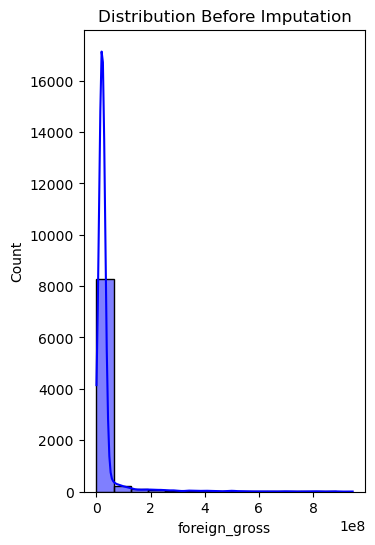

In [56]:
# Information in the foreign column is usefull, instead of dropping it we will have to impute
#imputing can be done using the mean or median depending on the distribution
# If it's a normal distribution, use the mean
# If it's a skewed distribution, use the median

# Create a figure with dimensions 8*6 inches
plt.figure(figsize=(8, 6))

# Create the first subplot (1 row, 2 columns, first plot)
plt.subplot(1, 2, 1)

# Plot the histogram with KDE of the 'bmi' column from stroke_data, dropping missing values
sns.histplot(df['foreign_gross'], kde=True, color='blue')

# Set title for the subplot
plt.title('Distribution Before Imputation')

In [57]:
# Affirming this is a skewed distribution 
df['foreign_gross'].fillna(df['foreign_gross'].median(), inplace = True)

In [58]:
#check for missing values after imputation
print(df.isnull().sum())

title                 5782
studio                5785
domestic_gross          22
foreign_gross            0
year                  5782
tconst                5782
original_title        5782
start_year            5782
runtime_minutes       5829
genres                5789
averagerating         5782
numvotes              5782
id                    3027
release_date          3027
movie                 3027
production_budget     3027
worldwide_gross       3027
Performance_Metric    5851
dtype: int64


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution After Imputation')

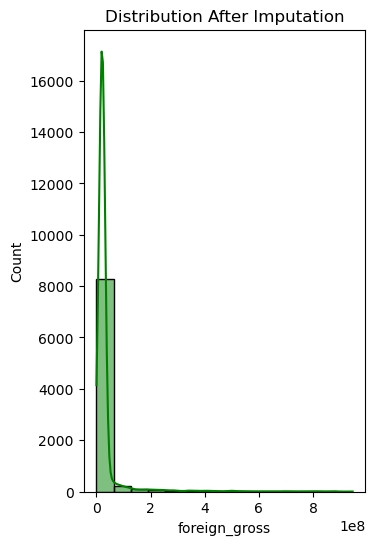

In [32]:
# Create a figure with dimensions 13x8 inches
plt.figure(figsize=(8, 6))

# Create the first subplot (1 row, 2 columns, first plot)
plt.subplot(1, 2, 1)

# Plot the histogram with KDE of the 'bmi' column from stroke_data, dropping missing values
sns.histplot(df['foreign_gross'], kde=True, color='Green')

# Set title for the subplot
plt.title('Distribution After Imputation')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8809 entries, 0 to 5781
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3027 non-null   object 
 1   studio              3024 non-null   object 
 2   domestic_gross      8787 non-null   float64
 3   foreign_gross       8809 non-null   float64
 4   year                3027 non-null   float64
 5   tconst              3027 non-null   object 
 6   original_title      3027 non-null   object 
 7   start_year          3027 non-null   float64
 8   runtime_minutes     2980 non-null   float64
 9   genres              3020 non-null   object 
 10  averagerating       3027 non-null   float64
 11  numvotes            3027 non-null   float64
 12  id                  5782 non-null   float64
 13  release_date        5782 non-null   object 
 14  movie               5782 non-null   object 
 15  production_budget   5782 non-null   object 
 16  worldwide_g

In [61]:
# Remove non-numeric characters from 'domestic_gross' column
#df['domestic_gross'] = df['domestic_gross'].str.replace('$', '').str.replace(',', '')

# Convert 'domestic_gross' column to float
#df['domestic_gross'] = df['domestic_gross'].astype(float)

# Remove non-numeric characters from 'domestic_gross' column
df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True)

# Convert 'domestic_gross' column to float
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors='coerce')


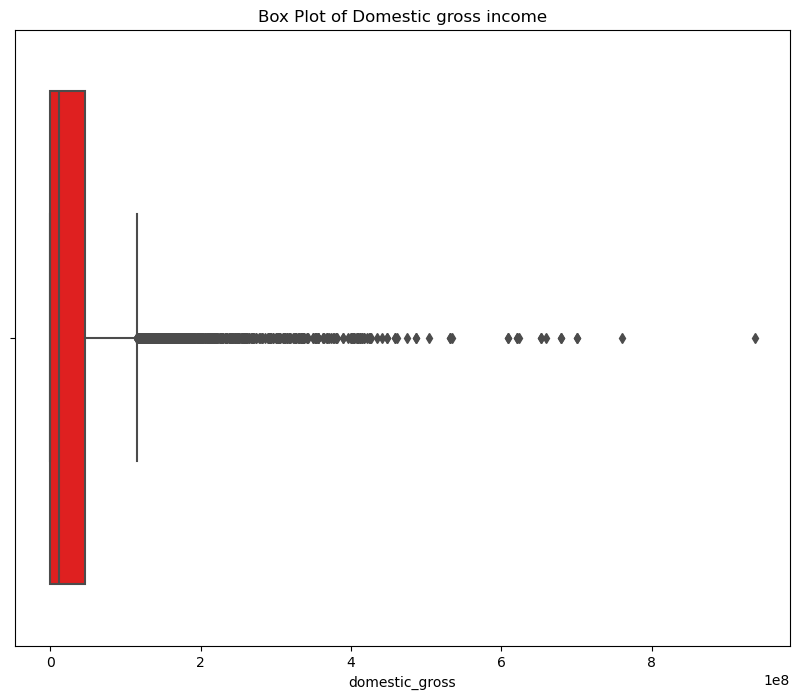

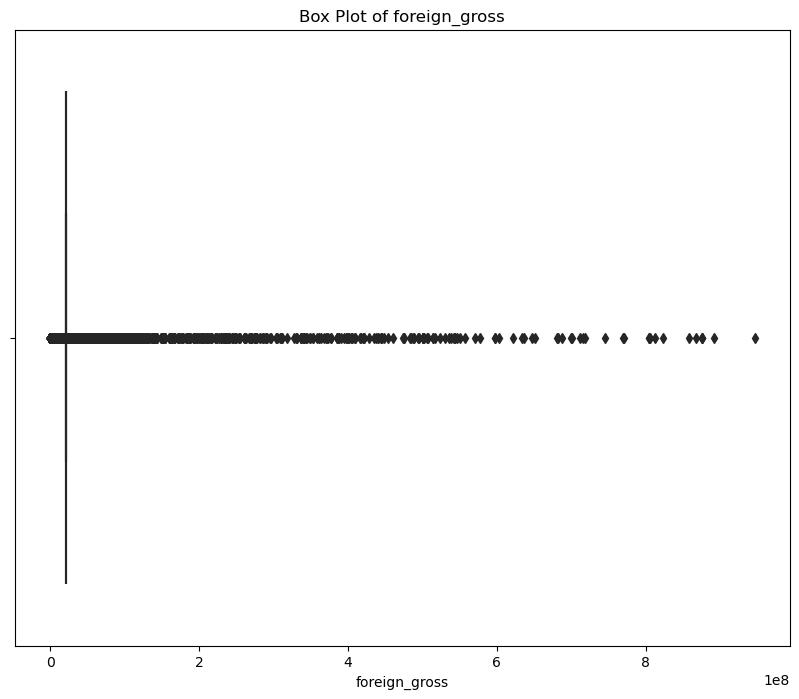

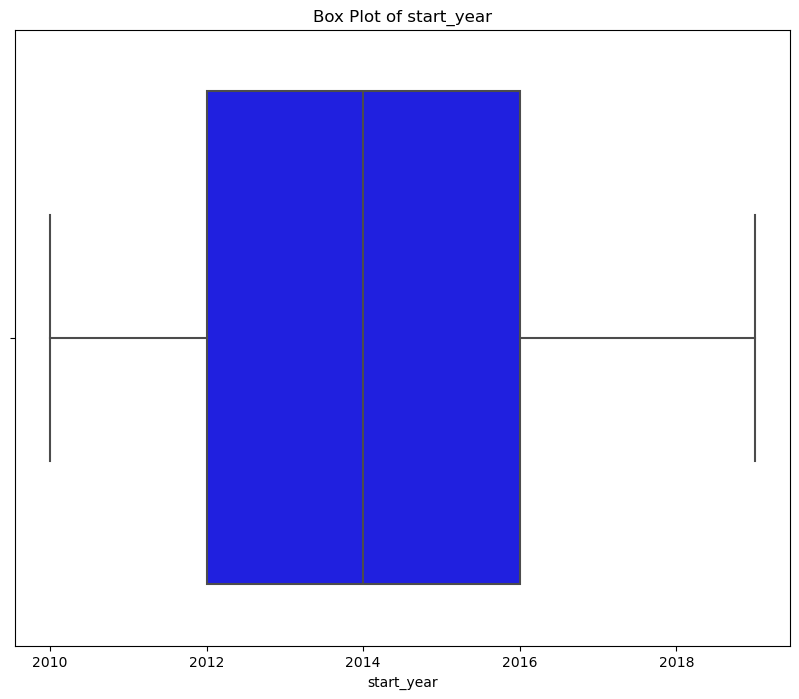

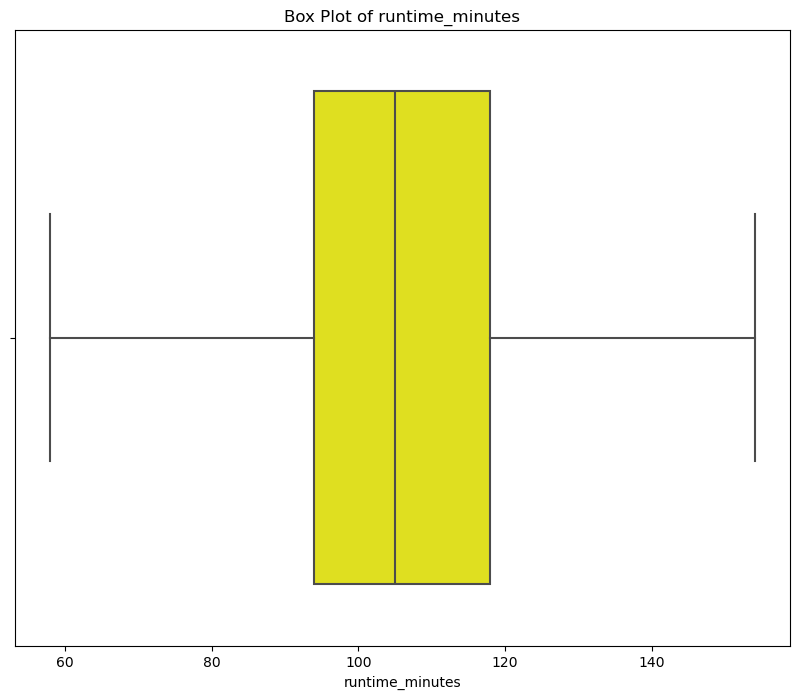

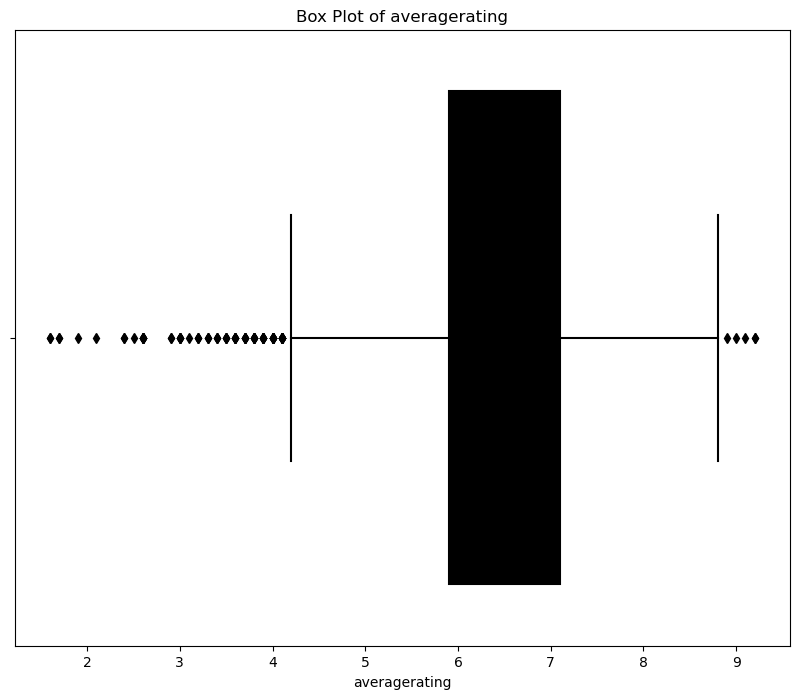

In [62]:
# Check for outliers 

# 1.identify the outliers by using box plots
# domestic_gross column
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['domestic_gross'], color='red')
plt.title('Box Plot of Domestic gross income')
plt.show()

# foreign_gross column
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['foreign_gross'], color='green')
plt.title('Box Plot of foreign_gross')
plt.show()

# start_year column
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['start_year'], color='blue')
plt.title('Box Plot of start_year')
plt.show()

# runtime_minutes column
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['runtime_minutes'], color='yellow')
plt.title('Box Plot of runtime_minutes')
plt.show()

# averagerating column
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['averagerating'], color='black')
plt.title('Box Plot of averagerating')
plt.show()

### Dealing with outliers

In [63]:
# cap run time outliers

# Calculate IQR for the 'run time' column
Q1 = df['runtime_minutes'].quantile(0.25)
Q3 = df['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['runtime_minutes'] < lower_bound) | (df['runtime_minutes'] > upper_bound)]

# Capping outliers to the upper and lower bounds
df['runtime_minutes'] = df['runtime_minutes'].clip(lower=lower_bound, upper=upper_bound)

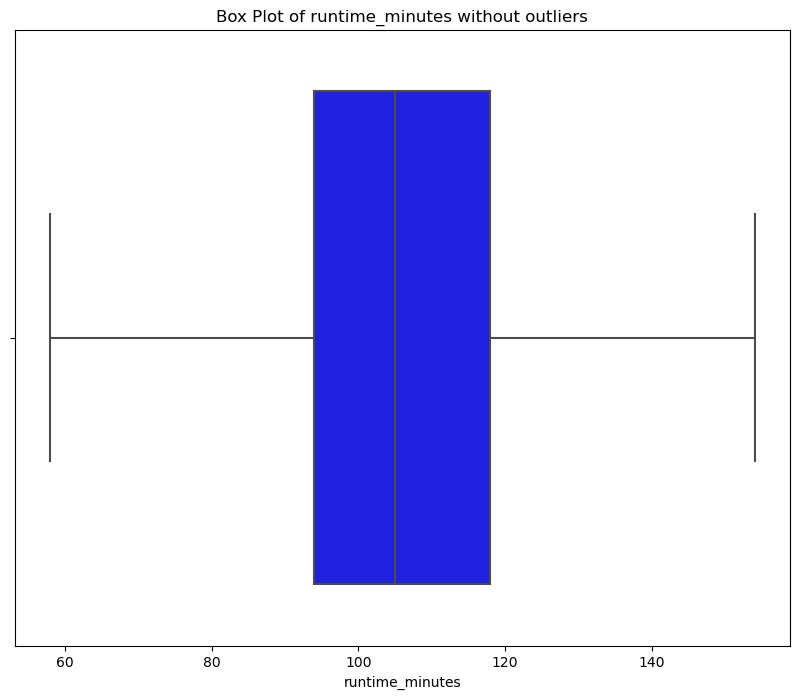

In [37]:
# runtime_minutes column after removing outliers
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['runtime_minutes'], color='blue')
plt.title('Box Plot of runtime_minutes without outliers')
plt.show()

### Dealing with Duplicates

In [64]:
# Check for duplicate rows
print(df[df.duplicated()])

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year, tconst, original_title, start_year, runtime_minutes, genres, averagerating, numvotes, id, release_date, movie, production_budget, worldwide_gross, Performance_Metric]
Index: []


The result indicates that there are no identical rows present in the DataFrame. This implies that each row is distinct, either considering all columns or the specific subset of columns examined for potential duplicates.

### EXPLARATORY DATA ANALYSIS

In [65]:
df.describe()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,id,Performance_Metric
count,8.787000e+03,8.809000e+03,3027.000000,3027.000000,2980.000000,3027.000000,3.027000e+03,5782.000000,2.958000e+03
mean,3.803184e+07,3.306489e+07,2014.075652,2013.781302,107.045638,6.457912,6.169492e+04,50.372363,1.086395e+07
std,6.792872e+07,6.730487e+07,2.442307,2.466780,18.857585,1.012225,1.255155e+05,28.821076,2.137214e+07
min,0.000000e+00,6.000000e+02,2010.000000,2010.000000,58.000000,1.600000,5.000000e+00,1.000000,1.377825e+03
25%,3.998360e+05,2.120000e+07,2012.000000,2012.000000,94.000000,5.900000,2.107000e+03,25.000000,2.652145e+06
50%,1.148768e+07,2.120000e+07,2014.000000,2014.000000,105.000000,6.600000,1.308900e+04,50.000000,2.766603e+06
75%,4.639182e+07,2.120000e+07,2016.000000,2016.000000,118.000000,7.100000,6.276550e+04,75.000000,8.887315e+06
max,9.366622e+08,9.464000e+08,2018.000000,2019.000000,154.000000,9.200000,1.841066e+06,100.000000,1.758414e+08


In [66]:
# Count the number of unique genres
num_genres = df['genres'].nunique()

print("Number of genres:", num_genres)

Number of genres: 322


#### Grouping by genre and doing the descriptive analysis

In [67]:
# Group by 'genres' and calculate various statistics
genre_stats = df.groupby('genres').agg({
    'averagerating': 'mean',                # Mean rating
    'domestic_gross': 'mean',               # Mean domestic gross income
    'foreign_gross': 'mean',                # Mean foreign gross
    'runtime_minutes': 'mean',              # Mean runtime
    'numvotes': 'mean',                     # Mean numvotes

})

print(genre_stats)

                            averagerating  domestic_gross  foreign_gross  \
genres                                                                     
Action                           6.116667    1.032559e+07   3.913889e+07   
Action,Adventure                 5.866667    5.408333e+04   1.480783e+07   
Action,Adventure,Animation       7.354545    9.930275e+07   1.988864e+08   
Action,Adventure,Biography       7.000000    6.005725e+07   1.470250e+08   
Action,Adventure,Comedy          6.271875    9.913976e+07   2.075812e+08   
...                                   ...             ...            ...   
Romance,Thriller                 5.850000    2.736500e+05   6.560500e+06   
Sci-Fi                           5.050000    2.063390e+08   2.152500e+08   
Sport                            7.900000    5.300000e+06   2.120000e+07   
Thriller                         5.728000    2.097900e+07   3.993609e+07   
Thriller,Western                 6.400000    2.110000e+04   3.000000e+05   

           

In [68]:
# Find the genre with the highest and lowest values for each category
highest_ratings = genre_stats['averagerating'].idxmax()
lowest_ratings = genre_stats['averagerating'].idxmin()

highest_domestic_gross = genre_stats['domestic_gross'].idxmax()
lowest_domestic_gross = genre_stats['domestic_gross'].idxmin()

highest_foreign_gross = genre_stats['foreign_gross'].idxmax()
lowest_foreign_gross = genre_stats['foreign_gross'].idxmin()

longest_runtime = genre_stats['runtime_minutes'].idxmax()
shortest_runtime = genre_stats['runtime_minutes'].idxmin()

most_numvotes = genre_stats['numvotes'].idxmax()
least_numvotes = genre_stats['numvotes'].idxmin()


# Print the results
print("Highest average rating genre:", highest_ratings)
print("Lowest average rating genre:", lowest_ratings)
print("Genre with highest foreign gross:", highest_foreign_gross)
print("Genre with lowest foreign gross:", lowest_foreign_gross)
print("Genre with highest domestic gross:", highest_domestic_gross)
print("Genre with lowest domestic gross:", lowest_domestic_gross)
print("Genre with most numvotes:", most_numvotes)
print("Genre with least numvotes:", least_numvotes)
print("Genre with longest runtime:", longest_runtime)
print("Genre with shortest runtime:", shortest_runtime)


Highest average rating genre: Adventure
Lowest average rating genre: Comedy,Thriller
Genre with highest foreign gross: Adventure,Drama,Sport
Genre with lowest foreign gross: Biography,Documentary,Thriller
Genre with highest domestic gross: Adventure,Drama,Sport
Genre with lowest domestic gross: Comedy,Thriller
Genre with most numvotes: Adventure,Drama,Sci-Fi
Genre with least numvotes: Documentary,Drama,Romance
Genre with longest runtime: Drama,History,Sport
Genre with shortest runtime: Action,Sport


In [44]:
# Find the top 5 and bottom 5 genres for each category
top_bottom_genres = {}

for column in genre_stats.columns:
    top_bottom_genres[column] = {
        'top_5': genre_stats[column].nlargest(5),
        'bottom_5': genre_stats[column].nsmallest(5)
    }

# Print the results
for category, values in top_bottom_genres.items():
    print(f"Category: {category}")
    print("Top 5 Genres:")
    print(values['top_5'])
    print("\nBottom 5 Genres:")
    print(values['bottom_5'])
    print("\n")

Category: averagerating
Top 5 Genres:
genres
Adventure                       9.2
Action,Sport                    8.4
Adventure,Drama,Sci-Fi          8.3
Biography,Documentary,Family    8.3
Animation,Drama,Romance         8.2
Name: averagerating, dtype: float64

Bottom 5 Genres:
genres
Comedy,Thriller          2.1
Comedy,Family,Sci-Fi     2.6
Action,Drama,Music       3.4
Drama,Mystery,Western    3.4
Fantasy,Horror           3.8
Name: averagerating, dtype: float64


Category: domestic_gross
Top 5 Genres:
genres
Adventure,Drama,Sport      4.007000e+08
Action,Adventure,Sci-Fi    2.345681e+08
Adventure,Drama,Sci-Fi     2.082000e+08
Documentary,Drama,Sport    2.067250e+08
Sci-Fi                     2.063390e+08
Name: domestic_gross, dtype: float64

Bottom 5 Genres:
genres
Comedy,Thriller           800.0
Fantasy,Thriller         1400.0
Action,Horror,Mystery    2800.0
Biography                4300.0
Comedy,Crime,History     4800.0
Name: domestic_gross, dtype: float64


Category: foreign_gross


### DATA VISUALIZATION

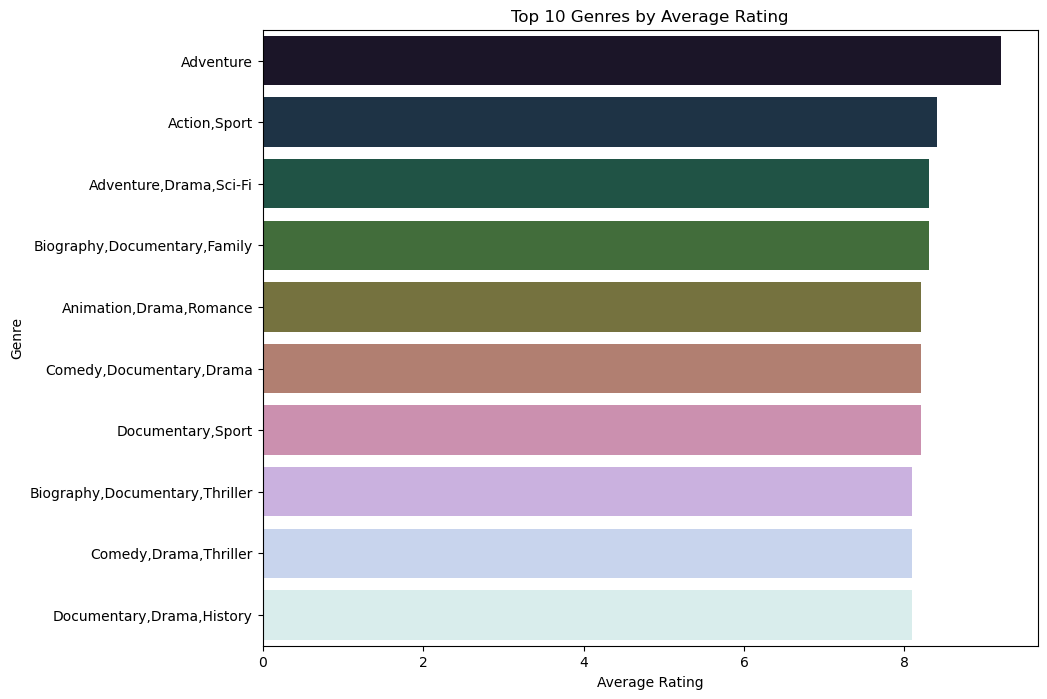

In [70]:
# A bar plot for average rating
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_stats['averagerating'].nlargest(10), y=genre_stats['averagerating'].nlargest(10).index, palette='cubehelix')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Rating')
plt.show()

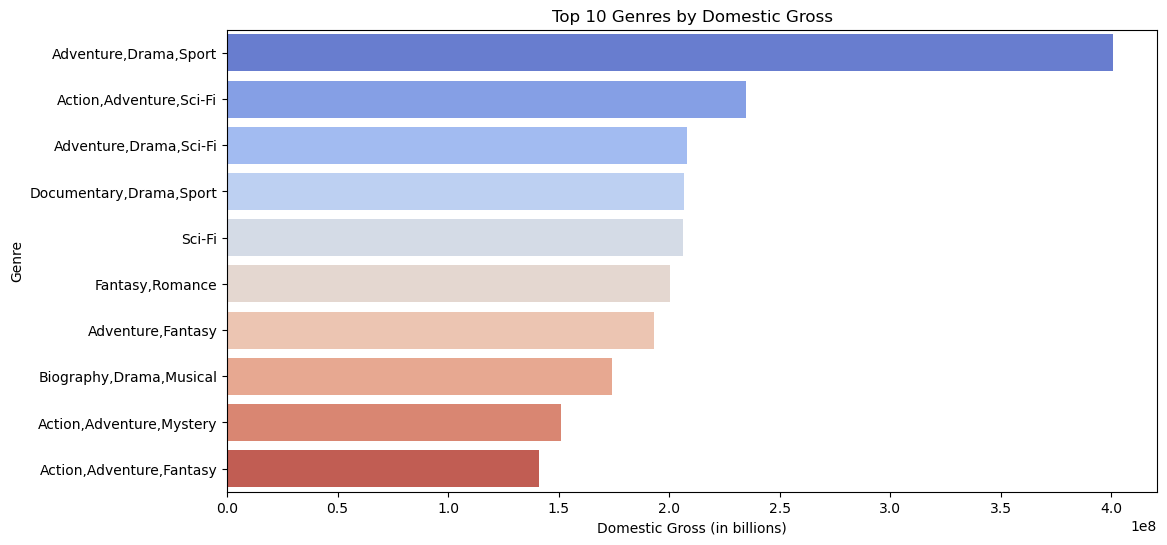

In [71]:
# # A bar plot for domestic gross
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_stats['domestic_gross'].nlargest(10), y=genre_stats['domestic_gross'].nlargest(10).index, palette='coolwarm')
plt.xlabel('Domestic Gross (in billions)')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Domestic Gross')
plt.show()

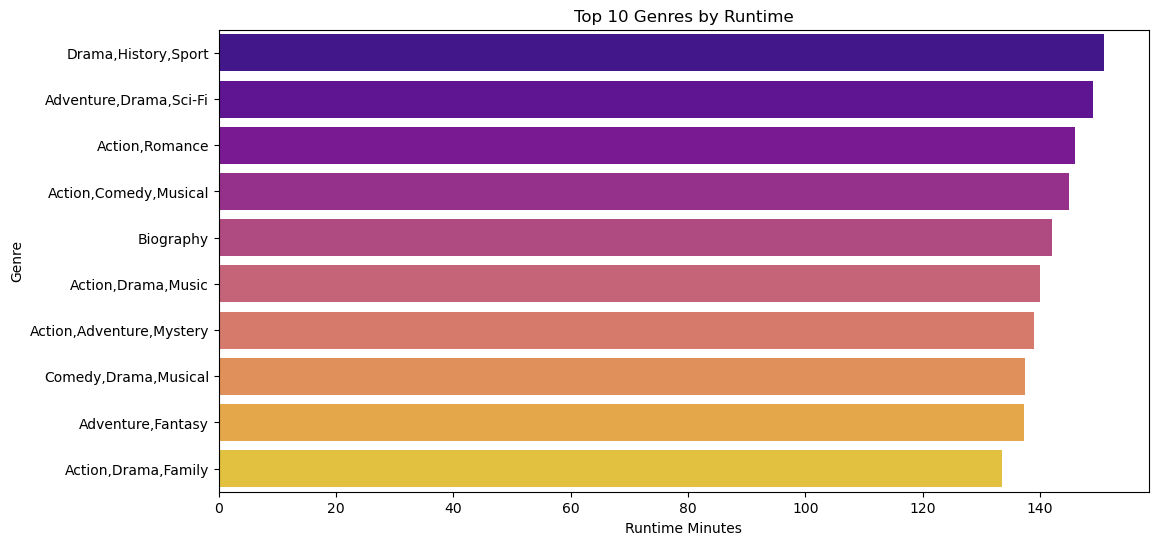

In [47]:
# a # A bar plot for runtime minutes
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_stats['runtime_minutes'].nlargest(10), y=genre_stats['runtime_minutes'].nlargest(10).index, palette='plasma')
plt.xlabel('Runtime Minutes')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Runtime')
plt.show()

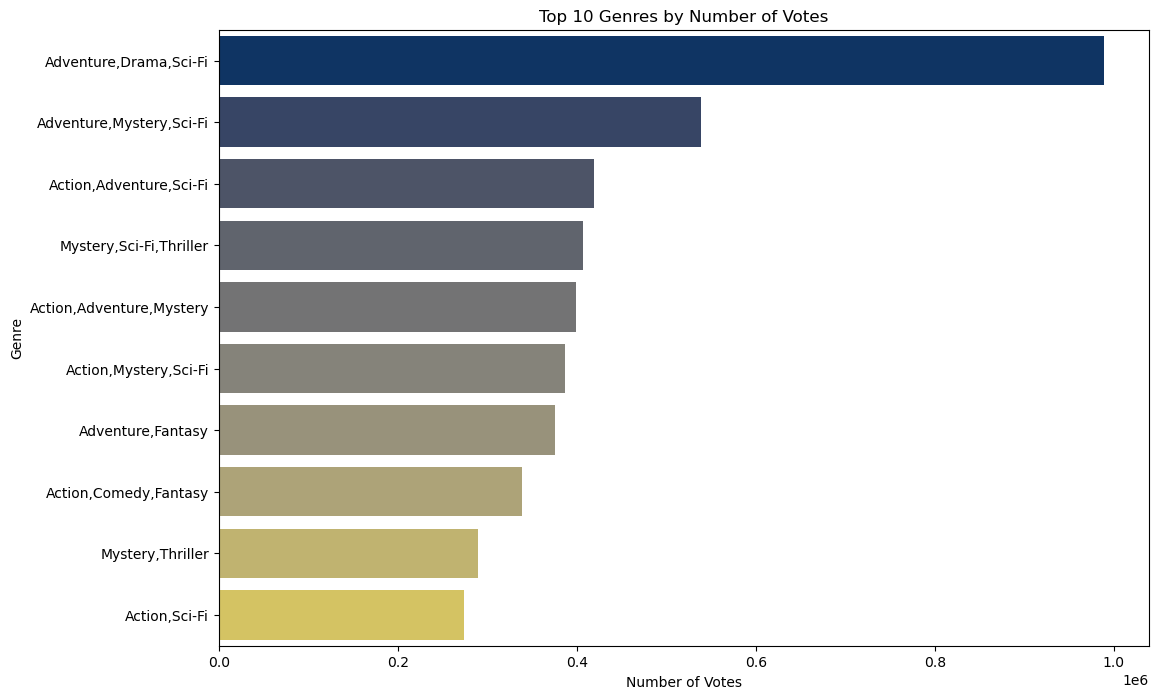

In [75]:
# A bar plot for number of votes
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_stats['numvotes'].nlargest(10), y=genre_stats['numvotes'].nlargest(10).index, palette='cividis')
plt.xlabel('Number of Votes')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Number of Votes')
plt.show()

In [76]:
# Finding out the best performing movie overall
# Assign equal weight to each category
weight_rating = 0.25
weight_gross = 0.25
weight_runtime = 0.25
weight_votes = 0.25

# Calculate performance metric for each movie
df['Performance_Metric'] = (weight_rating * df['averagerating'] +
                             weight_gross * (df['domestic_gross'] + df['foreign_gross']) / 2 +
                             weight_runtime * df['runtime_minutes'] +
                             weight_votes * df['numvotes'])

# Rank movies based on performance metric
ranked_movies = df.sort_values(by='Performance_Metric', ascending=False)

# Select the top-performing movie
best_performing_movie = ranked_movies.iloc[0]

# Print the best-performing movie
# Print the best-performing movie
# Print the best-performing movie's performance metric
print("Best Performing Movie:")
print(best_performing_movie[['title', 'Performance_Metric']])

Best Performing Movie:
title                 Avengers: Age of Ultron
Performance_Metric              175841435.575
Name: 1619, dtype: object


In [77]:
# Group by genre and calculate the mean performance metric for each genre
genre_performance = df.groupby('genres')['Performance_Metric'].mean()

# Find the genre with the highest mean performance metric
best_genre = genre_performance.idxmax()
best_genre_performance = genre_performance.max()

# Print the best performing genre and its performance metric
print(f"Best Performing Genre: {best_genre}")
print(f"Performance Metric: {best_genre_performance}")

Best Performing Genre: Adventure,Drama,Sport
Performance Metric: 159565602.55


In [78]:
#Finding the top 5 performing genres overall
# Sort the genres by their mean performance metric in descending order and select the top 5
top_5_genres = genre_performance.nlargest(5)

# Print the top 5 performing genres and their metrics
print("Top 5 Performing Genres:")
for genre, metric in top_5_genres.items():
    print(f"Genre: {genre}, Performance Metric: {metric}")

Top 5 Performing Genres:
Genre: Adventure,Drama,Sport, Performance Metric: 159565602.55
Genre: Adventure,Fantasy, Performance Metric: 88098145.33333333
Genre: Fantasy,Romance, Performance Metric: 82378432.35
Genre: Adventure,Drama,Sci-Fi, Performance Metric: 81966220.575
Genre: Action,Adventure,Sci-Fi, Performance Metric: 73661593.78962766


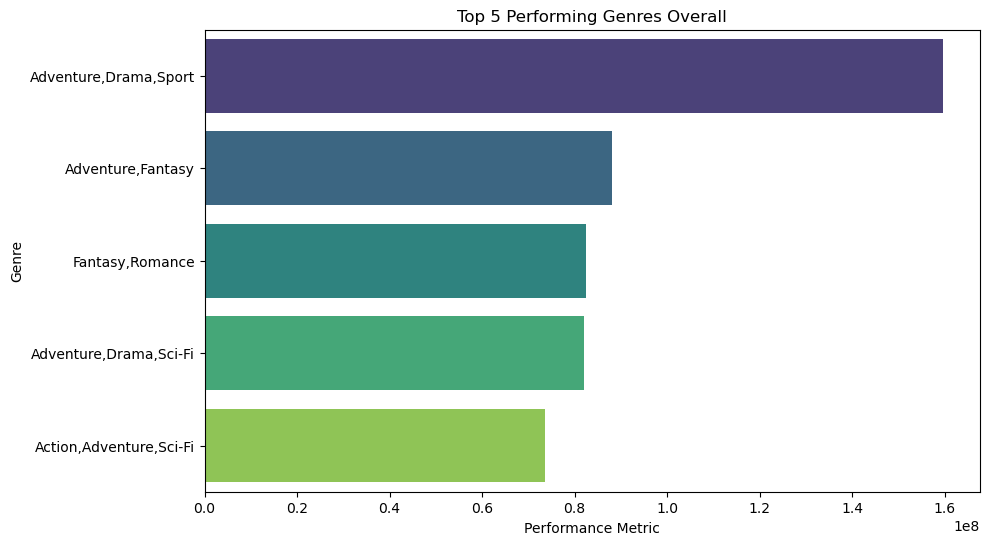

In [79]:
# Create a bar plot for the top 5 performing genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_genres.values, y=top_5_genres.index, palette='viridis')
plt.xlabel('Performance Metric')
plt.ylabel('Genre')
plt.title('Top 5 Performing Genres Overall')
plt.show()

### CORRELATION ANALYSIS

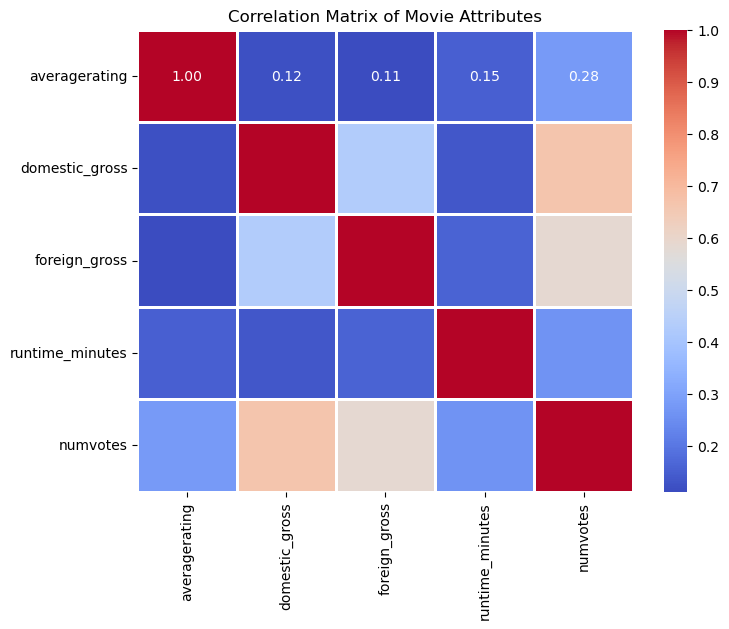

In [80]:
# Select numerical columns for correlation analysis
numerical_cols = ['averagerating', 'domestic_gross', 'foreign_gross', 'runtime_minutes', 'numvotes']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix of Movie Attributes')
plt.show()

### DATA ANALYSIS SUMMARY

Number of genres was 322

Highest average rating genre: Adventure

Lowest average rating genre: Comedy,Thriller

Genre with highest domestic gross: Adventure,Drama,Sport

Genre with lowest domestic gross: Comedy,

Genre with highest foreign gross: Adventure,Drama,Sport

Genre with lowest foreign gross: Biography,Documentary,Thriller

Genre with longest runtime: Drama,History,

Genre with shortest runtime: Action,Sport

Genre with most numvotes: Adventure,Drama,Sci-Fi

Genre with least numvotes: Documentary,Drama,Romance

Best Performing Genre: Adventure,Drama,Sport

#### Insights
#### Recommended genres for instant success are Adventure, Drama, Sci-Fi and Sports.
